# Palmer Penguins Project

***

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

This notebook contains my project for the Principles of Data Analytics module of the Higher Diploma in Science in Data Analytics given by ATU Galway-Mayo.

The dataset is available [on github](https://allisonhorst.github.io/palmerpenguins/).

I used [openincolab.com](https://openincolab.com/) to generate the following clickable badge:

<a target="_blank" href="https://colab.research.google.com/github/morgam7/poda-mywork/blob/main/penguins.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

It will open this notebook in [Google colab](https://colab.research.google.com/).




# Imports

We use pandas for the DataFrame data structure.

It allows us to investigate CSV files, amongst other things.

In [1]:
# Data frames.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Data

Load the Palmer Penguins Dataset from a url.

In [2]:
# Load the penguins data set.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [3]:
# Let's have a look.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
# Describe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
# Converting data to numpy arrays



# bill length
blen = df["bill_length_mm"]. to_numpy()

# bill depth
blepth = df["bill_depth_mm"]. to_numpy()

# flipper length
flen = df["flipper_length_mm"]. to_numpy()

# body_mass
mass = df["body_mass_g"]. to_numpy()



## Overview of the data set



I found a [helpful video](https://www.bing.com/videos/riverview/relatedvideo?q=palmer+penguins+dataset+variables&mid=55D478EACFBA66E11FEB55D478EACFBA66E11FEB&FORM=VIRE) giving a overview of the dataset and some ideas for how to use it in my analysis. This video also pointed me to the [original research paper](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081) that the dataset was derived from. The paper focuses on sexual dimorphism and environmental variability.

In [6]:
# Sex of penguins.
df['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [7]:
# Count the number of penguins of each sex.
df ['sex'].value_counts()


sex
MALE      168
FEMALE    165
Name: count, dtype: int64

### The Variables

In [8]:
# Look at the first row.
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

There are two types of variables in the Palmer Penguin data set. There are quantitative variables, which are variables with numerical values, and qualitative variables, which are variables that represent categories or groups. 

The quantitative variables are the bill length, bill depth, flipper length and body mass and the qualitative variables are species, island and sex.

The type of variable will determine the type of plot it is best to use. For instance histograms are best to use for one continuos quantitative variable, but if you want to visualise more than one quantitative variable a scatterplot is needed. Bar charts are used to display qualitative variables.

I had to do some research on [which types of plots worked with the different types of variables](https://piktochart.com/blog/types-of-graphs/#areagraph). I was especially confused about [the difference between bar charts and histograms](https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts#:~:text=Histograms%20visualize%20quantitative%20data%20or,bar%20charts%20display%20categorical%20variables).

### Bar chart

I was curious about if there are any sex differences in the mass of the penguins. My assumption would be that the females are smaller than the males, becasue that it usually the case. It would be interesting to see if my gender prejudice is correct. 

I decided to make a simple bar chart that plots the mean mass of male vs female penguins.

I found [this simple tutorial](https://www.w3schools.com/python/matplotlib_bars.asp) useful for understanding how to make bar charts. It looked straight forward enough but getting the dataset to make the bar chart was a bit more complicated. 

To get the mean mass of each gender I needed to seperate out the male and female data. [This site](https://datagy.io/filter-pandas/) gave a simple tutorial on how to filter Pandas dataframes. 

In [9]:
# This filters the rows to a specific string in the data - in this case the strings are MALE and FEMALE

maledata = df[df['sex'] =='MALE']
femaledata = df[df['sex']=='FEMALE']

# Just to check it worked
print(maledata)
print(femaledata)

# Now need to convert to numpy arrays
malemass = maledata["body_mass_g"]. to_numpy()
femalemass = femaledata["body_mass_g"]. to_numpy() 

# checking it worked
print(malemass)
print(femalemass)


    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
7    Adelie  Torgersen            39.2           19.6              195.0   
13   Adelie  Torgersen            38.6           21.2              191.0   
14   Adelie  Torgersen            34.6           21.1              198.0   
..      ...        ...             ...            ...                ...   
333  Gentoo     Biscoe            51.5           16.3              230.0   
335  Gentoo     Biscoe            55.1           16.0              230.0   
337  Gentoo     Biscoe            48.8           16.2              222.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g   sex  
0         3750.0  MALE  
5         3650.0  MALE  
7         46

Now I need to find the mean of malemass and femalemass. [This site](https://www.geeksforgeeks.org/numpy-mean-in-python/) showed me how.

In [10]:
malemassmean = np.mean(malemass)
femalemassmean = np.mean(femalemass)

#seeing if it worked
print(malemassmean)
print(femalemassmean)


4545.684523809524
3862.2727272727275


And now I can do the bar chart using bar(). Or so I thought but it turned out that I needed to create another dataset with the two means. [This tutorial](https://www.geeksforgeeks.org/bar-plot-in-matplotlib/) gave me the code to do this.

<BarContainer object of 2 artists>

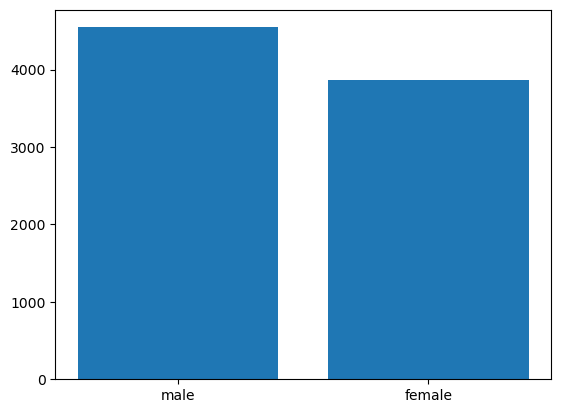

In [11]:
# Creating the dataset and assinging values to the x and y axis. I just needed to name the two bars on the x axis. 
# The y axis is the mean.
data = {'male':malemassmean, 'female':femalemassmean}
x = list(data.keys())
y = list(data.values())
  
plt.bar(x,y)

That seems like a lot of code for what is a very basic looking bar chart. There has to be a better way.

### Histogram 

Becasue I am interested in one quantitive variable (mass) I will use a histogram, and to see if there are any clear differences in mass between the sexes I will plot each gender with a different colour.

I will use seaborn's [displot function](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) to plot this. 



c:\Users\Marcella\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Mass')

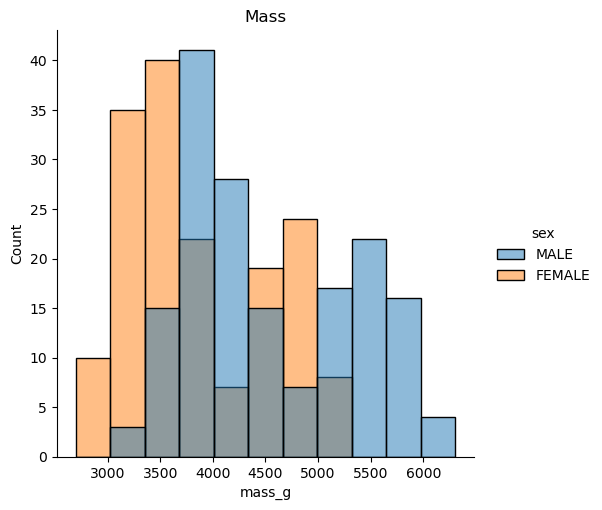

In [12]:
# In the displot function I can use the 'hue' parameter to plot the variable 'sex', which is a quantitative variable.

sns.displot(data=df, x="body_mass_g", hue="sex")


# Axis labels and title

plt.xlabel('mass_g')
plt.title ('Mass')

Sadly my prejudice was correct. The largest penguins are all male. Though there are some small males, the smallest are female. 


## Mass and Species

I'm interested in seeing how the mass differs between the three different species.

c:\Users\Marcella\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


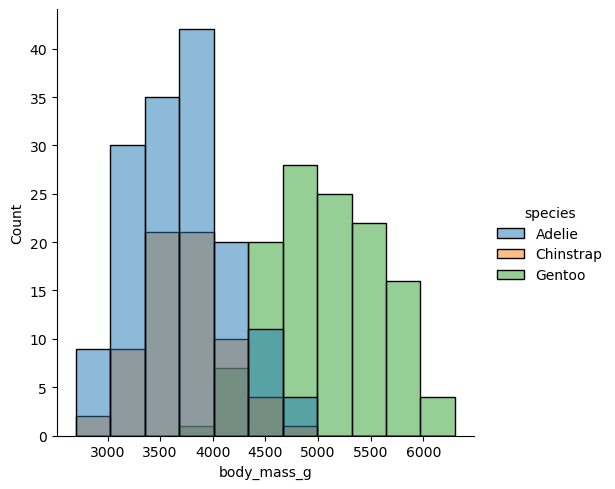

In [14]:
# I'm going to change the hue to species to see if there are difference in mass between the species.

sns.displot(data=df, x="body_mass_g", hue="species")

So it looks like Adelie and chinstrap are about the same size with gentoo being a lot bigger.

It would be interesting to see if the difference in male and female mass are similar across all the species. And if they aren't then why not?

This is the long way around again but I want to see a plot of each species and the mean mass of males and females. So I need to 
create those datasets first.

In [17]:
# Going to repeat what I did earlier to get the mean mass of each species

maleadelie = maledata[maledata['species'] =='Adelie']
femaleadelie = femaledata[femaledata['species']=='Adelie']
malechinstrap = maledata[maledata['species'] == 'Chinstrap']
femalechinstrap = femaledata[femaledata['species']=='Chinstrap']
malegentoo = maledata[maledata['species'] == 'Gentoo']
femalegentoo = femaledata[femaledata['species']=='Gentoo']

# Now need to convert to numpy arrays
malemassadelie = maleadelie["body_mass_g"]. to_numpy()
femalemassadelie = femaleadelie["body_mass_g"]. to_numpy() 
malemasschinstrap = malechinstrap["body_mass_g"]. to_numpy()
femalemasschinstrap = femalechinstrap["body_mass_g"]. to_numpy() 
malemassgentoo = malegentoo["body_mass_g"]. to_numpy()
femalemassgentoo = femalegentoo["body_mass_g"]. to_numpy() 

# Getting the mean
malemassadeliemean = np.mean(malemassadelie)
femalemassadeliemean = np.mean(femalemassadelie)
malemasschinstrapmean = np.mean(malemasschinstrap)
femalemasschinstrapmean = np.mean(femalemasschinstrap)
malemassgentoomean = np.mean(malemassgentoo)
femalemassgentoomean = np.mean(femalemassgentoo)

print (malemassadeliemean,malemasschinstrapmean, malemassgentoomean)
print (femalemassadeliemean, femalemasschinstrapmean, femalemassgentoomean)

4043.4931506849316 3938.970588235294 5484.836065573771
3368.8356164383563 3527.205882352941 4679.741379310345


<BarContainer object of 6 artists>

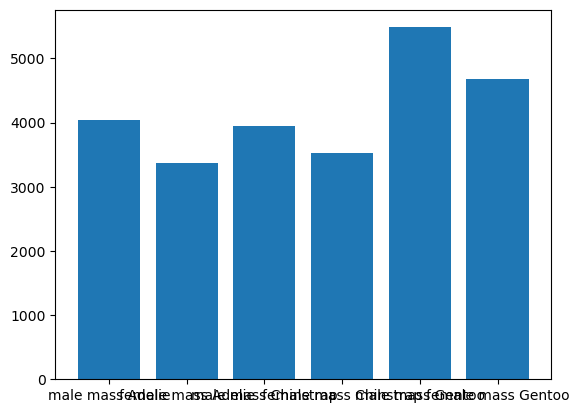

In [18]:
# Now to do the barchart

data = {'male mass Adelie':malemassadeliemean, 'female mass Adelie':femalemassadeliemean,
        'male mass Chinstrap':malemasschinstrapmean, 'female mass Chinstrap':femalemasschinstrapmean,
        'male mass Gentoo':malemassgentoomean, 'female mass Gentoo':femalemassgentoomean,}
x = list(data.keys())
y = list(data.values())
  
plt.bar(x,y)

So in all the species the famales are smaller than the males. It looks like they are smaller than the males by around the same amount. But lets just look and see by how much.

In [24]:
print ("Adeleie diff: ", ((malemassadeliemean - femalemassadeliemean) / malemassadeliemean) * 100)
print ("Chinstrap diff: ", ((malemasschinstrapmean - femalemasschinstrapmean) / malemasschinstrapmean) * 100)
print ("Gentoo diff: ", ((malemassgentoomean - femalemassgentoomean) / malemassgentoomean) * 100)

Adeleie diff:  16.68501736258152
Chinstrap diff:  10.453612096322574
Gentoo diff:  14.6785551407215


So Gentoo and Adelie are fairly similar with Chinstrap difference being a bit less. Though there were less Chinstrap samples and that might have had an affect.

# My Analysis
I'm also interested in if the bill length and bill depth are correlated to mass. Do the bigger penguins have bigger beaks?

Project (40%)
Select two variables from the data set and provide an analysis of how correlated they are.


It would be interesting to measure the correlation between the mass of the birds and the size of their beaks. Is it a case that the bigger the bird the bigger the beak? Or are there some wee little penguins out there with massive honkers?
# Measure the correlation.
np.corrcoef(plen, pwidth)
array([[1.        , 0.96286543],
       [0.96286543, 1.        ]])

***

### End